# Installing Libraries

In [1]:
import warnings 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

import warnings
warnings.simplefilter('ignore')

# Reading Data

In [2]:
train = pd.read_csv('titanic_train.csv') 

# Data Understanding

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# To know number of columns and rows 
train.shape 

(891, 12)

In [5]:
train.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
train.isnull().sum() 

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
train['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [8]:
train['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [9]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Data Cleaning

In [10]:
# Create a new column cabin_1 indicating 
# if the cabin value was given or was NaN 
train["Cabin_1"] = (train["Cabin"].notnull().astype('int')) 

In [11]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_1
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [12]:
# Delete the column 'Cabin',Ticket from train
train = train.drop(['Cabin'], axis=1)
train = train.drop(['Ticket'], axis=1) 
train = train.drop(['Fare'], axis=1) 

In [13]:
# Renaming cabin_1 column name to Cabin
train.rename(columns={'Cabin_1': 'Cabin'}, inplace=True)

In [14]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Embarked,Cabin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,S,0


In [15]:
# Embraked column null values filling
train['Embarked'].mode()

0    S
Name: Embarked, dtype: object

In [16]:
# replacing the missing values in 
train = train.fillna({"Embarked": "S"}) 

In [17]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Embarked         0
Cabin            0
dtype: int64

In [18]:
# Age column null values filling
train['Age'].mean()
train['Age'] = train['Age'].fillna(np.mean(train['Age'])).astype(int)

In [19]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Embarked       0
Cabin          0
dtype: int64

In [20]:
train['Name'].unique()

array(['Braund, Mr. Owen Harris',
       'Cumings, Mrs. John Bradley (Florence Briggs Thayer)',
       'Heikkinen, Miss. Laina',
       'Futrelle, Mrs. Jacques Heath (Lily May Peel)',
       'Allen, Mr. William Henry', 'Moran, Mr. James',
       'McCarthy, Mr. Timothy J', 'Palsson, Master. Gosta Leonard',
       'Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)',
       'Nasser, Mrs. Nicholas (Adele Achem)',
       'Sandstrom, Miss. Marguerite Rut', 'Bonnell, Miss. Elizabeth',
       'Saundercock, Mr. William Henry', 'Andersson, Mr. Anders Johan',
       'Vestrom, Miss. Hulda Amanda Adolfina',
       'Hewlett, Mrs. (Mary D Kingcome) ', 'Rice, Master. Eugene',
       'Williams, Mr. Charles Eugene',
       'Vander Planke, Mrs. Julius (Emelia Maria Vandemoortele)',
       'Masselmani, Mrs. Fatima', 'Fynney, Mr. Joseph J',
       'Beesley, Mr. Lawrence', 'McGowan, Miss. Anna "Annie"',
       'Sloper, Mr. William Thompson', 'Palsson, Miss. Torborg Danira',
       'Asplund, Mrs. Carl Oscar 

In [21]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Embarked,Cabin
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,S,0


In [22]:
def replace_names(row):
    if row['Sex'] == 'male':
        return f"Mr {row['Name']}"
    elif row['Sex'] == 'female':
        return f"Miss {row['Name']}"
    else:
        return row['Name']

# Apply the function to the name column
train['Name'] = train.apply(replace_names, axis=1)

In [23]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Embarked,Cabin
0,1,0,3,"Mr Braund, Mr. Owen Harris",male,22,1,0,S,0
1,2,1,1,"Miss Cumings, Mrs. John Bradley (Florence Brig...",female,38,1,0,C,1
2,3,1,3,"Miss Heikkinen, Miss. Laina",female,26,0,0,S,0
3,4,1,1,"Miss Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,S,1
4,5,0,3,"Mr Allen, Mr. William Henry",male,35,0,0,S,0


In [24]:
train['Name'] = train['Name'].str.split().str[0]

In [25]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Embarked,Cabin
0,1,0,3,Mr,male,22,1,0,S,0
1,2,1,1,Miss,female,38,1,0,C,1
2,3,1,3,Miss,female,26,0,0,S,0
3,4,1,1,Miss,female,35,1,0,S,1
4,5,0,3,Mr,male,35,0,0,S,0


In [26]:
train['Age'].unique()

array([22, 38, 26, 35, 29, 54,  2, 27, 14,  4, 58, 20, 39, 55, 31, 34, 15,
       28,  8, 19, 40, 66, 42, 21, 18,  3,  7, 49, 65,  5, 11, 45, 17, 32,
       16, 25,  0, 30, 33, 23, 24, 46, 59, 71, 37, 47, 70, 12,  9, 36, 51,
       44,  1, 61, 56, 50, 62, 41, 52, 63, 43, 60, 10, 64, 13, 48, 53, 57,
       80,  6, 74])

In [27]:
def categorize_age(Age):
    if Age <= 17:
        return 'Child'
    elif Age <= 64:
        return 'Adult'
    else:
        return 'Senior Citizen'

# Apply the function to the age column
train['age_group'] = train['Age'].apply(categorize_age)


In [28]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Embarked,Cabin,age_group
0,1,0,3,Mr,male,22,1,0,S,0,Adult
1,2,1,1,Miss,female,38,1,0,C,1,Adult
2,3,1,3,Miss,female,26,0,0,S,0,Adult
3,4,1,1,Miss,female,35,1,0,S,1,Adult
4,5,0,3,Mr,male,35,0,0,S,0,Adult


In [29]:
train['age_group'].unique()

array(['Adult', 'Child', 'Senior Citizen'], dtype=object)

In [30]:
train = train.drop(['Age'], axis=1) 

In [31]:
# Renaming age group column name to Age
train.rename(columns={'age_group':'Age'}, inplace=True)

In [32]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Embarked,Cabin,Age
0,1,0,3,Mr,male,1,0,S,0,Adult
1,2,1,1,Miss,female,1,0,C,1,Adult
2,3,1,3,Miss,female,0,0,S,0,Adult
3,4,1,1,Miss,female,1,0,S,1,Adult
4,5,0,3,Mr,male,0,0,S,0,Adult


# Encoding

In [33]:
train['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [34]:
train['Embarked'].value_counts()

Embarked
S    646
C    168
Q     77
Name: count, dtype: int64

In [35]:
train['Name'].value_counts()

Name
Mr      577
Miss    314
Name: count, dtype: int64

In [36]:
train['Age'].value_counts()

Age
Adult             767
Child             113
Senior Citizen     11
Name: count, dtype: int64

In [37]:
# converting categorical columns i.e, sex and embarked into a numerical values
train.replace({'Sex':{'male':0, 'female': 1} , 'Embarked': {'S':0, 'C':1, 'Q':2} , 'Name':{'Mr':0 , 'Miss':1} , 'Age':
              {'Adult':0 , 'Child':1,'Senior Citizen':3}} , inplace=True)

In [38]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Embarked,Cabin,Age
0,1,0,3,0,0,1,0,0,0,0
1,2,1,1,1,1,1,0,1,1,0
2,3,1,3,1,1,0,0,0,0,0
3,4,1,1,1,1,1,0,0,1,0
4,5,0,3,0,0,0,0,0,0,0


# Splitting x_train and y_train

In [39]:
X_train = train.drop("Survived", axis=1)
Y_train = train["Survived"]

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

# LogisticRegression

In [41]:
#Modelling
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()
log_model.fit(X_train,Y_train)

#Predict & Evaluate on train data
ypred_train = log_model.predict(X_train)
print('Train Accuracy :', accuracy_score(Y_train,ypred_train))

# Cross Validation on train data
print('CV Score :', cross_val_score(log_model,X_train,Y_train,cv=5,scoring='accuracy').mean())

Train Accuracy : 0.8047138047138047
CV Score : 0.7845019145063084


# KNN

In [42]:
#Hyper parameter tuning
estimator =  KNeighborsClassifier()
param_grid = {'n_neighbors': list(range(1,50)), 'p':[1,2]}
knn_grid = GridSearchCV(estimator,param_grid, scoring='accuracy',cv=5)
knn_grid.fit(X_train,Y_train)

#KNN with best hyperparameters
knn_grid.best_estimator_

KNeighborsClassifier(n_neighbors=40, p=1)

In [43]:
#Modelling
knn_model = knn_grid.best_estimator_
knn_model.fit(X_train,Y_train)

#Predict & Evaluate on train data
ypred_train = knn_model.predict(X_train)
print('Train Accuracy :', accuracy_score(Y_train,ypred_train))

# Cross Validation on train data
print('CV Score :', cross_val_score(knn_model,X_train,Y_train,cv=5,scoring='accuracy').mean())

Train Accuracy : 0.6318742985409652
CV Score : 0.621781432427343


# SVM

In [44]:
#Hyper parameter tuning
estimator =  SVC()
param_grid = {'C':[0.01,0.1,1], 'kernel':['linear','rbf','sigmoid','poly']}
svm_grid = GridSearchCV(estimator,param_grid, scoring='accuracy',cv=5)
svm_grid.fit(X_train,Y_train)

#SVM with best hyperparameters
svm_grid.best_estimator_

SVC(C=0.01, kernel='linear')

In [45]:
#Modelling
svm_model = svm_grid.best_estimator_
svm_model.fit(X_train,Y_train)

#Predict & Evaluate on train data
ypred_train = svm_model.predict(X_train)
print('Train Accuracy :', accuracy_score(Y_train,ypred_train))

# Cross Validation on train data
print('CV Score :', cross_val_score(svm_model,X_train,Y_train,cv=5,scoring='accuracy').mean())

Train Accuracy : 0.7867564534231201
CV Score : 0.7867365513778168


# Decision Tree

In [46]:
model = DecisionTreeClassifier(random_state=True)
model.fit(X_train,Y_train)

DecisionTreeClassifier(random_state=True)

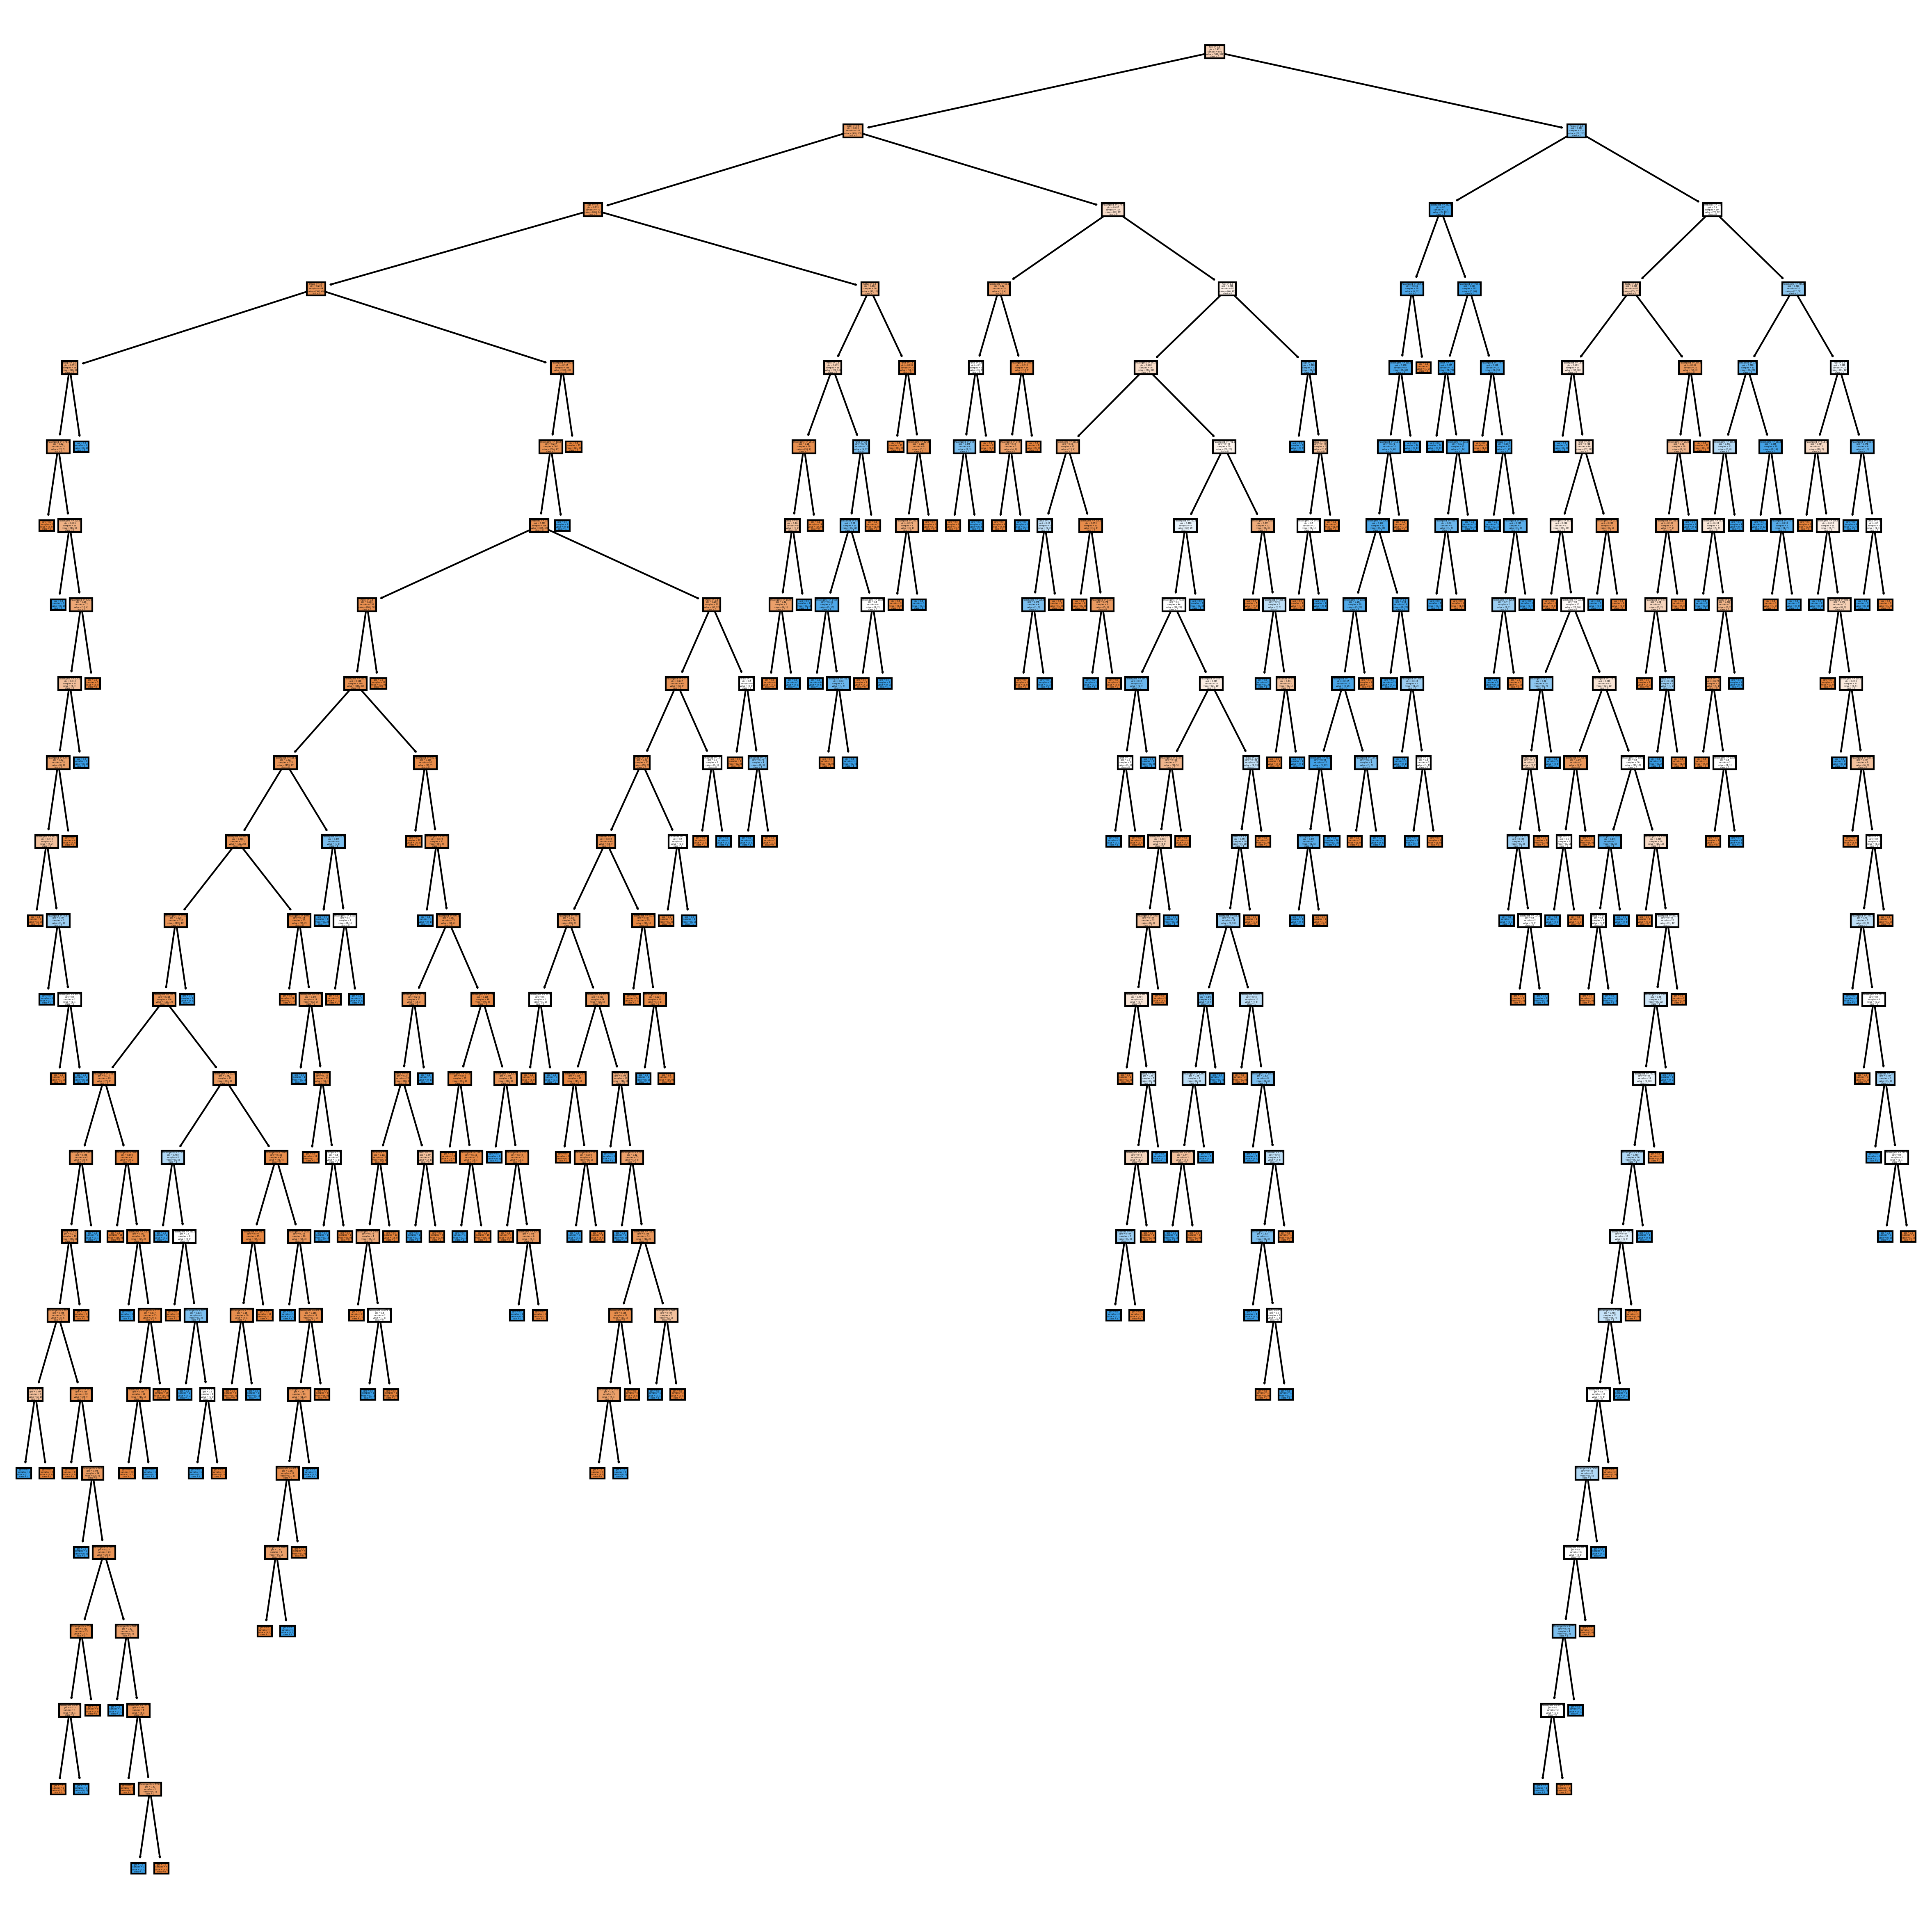

In [47]:
#Without pruning
from sklearn.tree import plot_tree
plt.figure(figsize=(20,20),dpi=300)
plot_tree(model,feature_names=X_train.columns.tolist(),class_names=['0','1'],filled=True)
plt.show()

In [48]:
#Hyper parameter tuning
estimator =  DecisionTreeClassifier(random_state=True)
param_grid = {'criterion':['gini','entropy'], 'max_depth':list(range(1,16))}
dt_grid = GridSearchCV(estimator,param_grid, scoring='accuracy',cv=5)
dt_grid.fit(X_train,Y_train)

#Decision tree with best hyperparameters
dt=dt_grid.best_estimator_
dt

DecisionTreeClassifier(max_depth=1, random_state=True)

In [49]:
# Important Features
feats_dt = pd.DataFrame(data=dt.feature_importances_,
                       index=X_train.columns,
                       columns=['Importance'])
important_features_dt = feats_dt[feats_dt['Importance']>0].index.tolist()
important_features_dt

['Sex']

In [50]:
#Selecting train & test data
X_train_dt = X_train[important_features_dt]

#Modelling 
dt=dt_grid.best_estimator_
dt.fit(X_train_dt,Y_train)

#Evalution
ypred_train = dt.predict(X_train_dt)


print('Train Accuracy :', accuracy_score(Y_train,ypred_train))
print('CV Score :', cross_val_score(dt,X_train,Y_train,cv=5,scoring='accuracy').mean())

Train Accuracy : 0.7867564534231201
CV Score : 0.7867365513778168


# Random Forest

In [51]:
#Hyper parameter tuning
estimator =  RandomForestClassifier(random_state=True)
param_grid = {'n_estimators':list(range(1,51))}
rf_grid = GridSearchCV(estimator,param_grid, scoring='accuracy',cv=5)
rf_grid.fit(X_train,Y_train)

#Random forest with best hyperparameters
rf = rf_grid.best_estimator_
rf

RandomForestClassifier(n_estimators=9, random_state=True)

In [52]:
# Important Features
feats_rf = pd.DataFrame(data = rf.feature_importances_,
                       index=X_train.columns,
                       columns=['Importance'])
important_features_rf = feats_rf[feats_rf['Importance']>0].index.tolist()
important_features_rf

['PassengerId',
 'Pclass',
 'Name',
 'Sex',
 'SibSp',
 'Parch',
 'Embarked',
 'Cabin',
 'Age']

In [53]:
#Selecting train & test data
X_train_rf = X_train[important_features_rf]

#Modelling 
rf = rf_grid.best_estimator_
rf.fit(X_train_rf,Y_train)

#Evalution
ypred_train = rf.predict(X_train_rf)


print('Train Accuracy :', accuracy_score(Y_train,ypred_train))
print('CV Score :', cross_val_score(rf,X_train,Y_train,cv=5,scoring='accuracy').mean())

Train Accuracy : 0.9708193041526375
CV Score : 0.7733726696378131


# Adaboost 

In [54]:
#Hyper parameter tuning
estimator =  AdaBoostClassifier(random_state=True)
param_grid = {'n_estimators':list(range(1,51))}

ab_grid = GridSearchCV(estimator,param_grid, scoring='accuracy',cv=5)
ab_grid.fit(X_train,Y_train)

#Ada Boost with best hyperparameters
ab = ab_grid.best_estimator_
ab

AdaBoostClassifier(n_estimators=1, random_state=True)

In [55]:
# Important Features
feats_ab = pd.DataFrame(data=ab.feature_importances_,
                       index=X_train.columns,
                       columns=['Importance'])
important_features_ab = feats_ab[feats_ab['Importance']>0].index.tolist()
important_features_ab

['Name']

In [56]:
#Selecting train & test data
X_train_ab = X_train[important_features_ab]

#Modelling 
ab = ab_grid.best_estimator_
ab.fit(X_train_ab,Y_train)

#Evalution
ypred_train = ab.predict(X_train_ab)


print('Train Accuracy :', accuracy_score(Y_train,ypred_train))
print('CV Score :', cross_val_score(ab,X_train,Y_train,cv=5,scoring='accuracy').mean())

Train Accuracy : 0.7867564534231201
CV Score : 0.7867365513778168


# Gradient Boost

In [57]:
#Hyper parameter tuning
estimator =  GradientBoostingClassifier(random_state=True)
param_grid = {'n_estimators':list(range(1,10)),
             'learning_rate':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]}

gb_grid = GridSearchCV(estimator,param_grid, scoring='accuracy',cv=5)
gb_grid.fit(X_train,Y_train)

#Gradient boost with best hyperparameters
gb = gb_grid.best_estimator_
gb

GradientBoostingClassifier(learning_rate=0.5, n_estimators=2, random_state=True)

In [58]:
# Important Features
feats_gb = pd.DataFrame(data = gb.feature_importances_,
                       index=X_train.columns,
                       columns=['Importance'])
important_features_gb = feats_gb[feats_gb['Importance']>0].index.tolist()
important_features_gb

['PassengerId', 'Pclass', 'Name', 'SibSp', 'Embarked', 'Cabin', 'Age']

In [59]:
#Selecting train & test data
X_train_gb = X_train[important_features_gb]

#Modelling 
gb = gb_grid.best_estimator_
gb.fit(X_train_gb,Y_train)

#Evalution
ypred_train = gb.predict(X_train_gb)


print('Train Accuracy :', accuracy_score(Y_train,ypred_train))
print('CV Score :', cross_val_score(gb,X_train,Y_train,cv=5,scoring='accuracy').mean())

Train Accuracy : 0.819304152637486
CV Score : 0.7868872010545477


# XGB

In [60]:
#Hyper parameter tuning
estimator =  XGBClassifier()
param_grid = {'n_estimators':[10,20,40,100],
              'max_depth':[3,4,5],
             'learning_rate':[0,0.15,0.3,0.5,1]}

xgb_grid = GridSearchCV(estimator,param_grid, scoring='accuracy',cv=5)
xgb_grid.fit(X_train,Y_train)

# XGB with best hyperparameters
xgb = xgb_grid.best_estimator_
xgb

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.15, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=10, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [61]:
# Important Features
feats_xgb = pd.DataFrame(data = xgb.feature_importances_,
                       index=X_train.columns,
                       columns=['Importance'])
important_features_xgb = feats_xgb[feats_xgb['Importance']>0].index.tolist()
important_features_xgb

['PassengerId', 'Pclass', 'Name', 'SibSp', 'Parch', 'Embarked', 'Cabin', 'Age']

In [62]:
#Selecting train & test data
X_train_xgb = X_train[important_features_xgb]

#Modelling 
xgb = xgb_grid.best_estimator_
xgb.fit(X_train_xgb,Y_train)

#Evalution
ypred_train = xgb.predict(X_train_xgb)


print('Train Accuracy :', accuracy_score(Y_train,ypred_train))
print('CV Score :', cross_val_score(xgb,X_train,Y_train,cv=5,scoring='accuracy').mean())

Train Accuracy : 0.8148148148148148
CV Score : 0.8024668884564685


# Test Data

In [63]:
test = pd.read_csv('titanic_test.csv') 

In [64]:
test_data = test.copy()
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [65]:
test.isnull().sum() 

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [66]:
# Create a new column cabin_1 indicating 
# if the cabin value was given or was NaN 
test["Cabin_1"] = (test["Cabin"].notnull().astype('int')) # Create a new column cabin_1 indicating 
# if the cabin value was given or was NaN 
test["Cabin_1"] = (test["Cabin"].notnull().astype('int')) 

In [67]:
# Delete the column 'Cabin',Ticket from train
test = test.drop(['Cabin'], axis=1)
test = test.drop(['Ticket'], axis=1) 
test = test.drop(['Fare'], axis=1) 

In [68]:
# Renaming cabin_1 column name to Cabin
test.rename(columns={'Cabin_1': 'Cabin'}, inplace=True)

In [69]:
# Embraked column null values filling
test['Embarked'].mode()

0    S
Name: Embarked, dtype: object

In [70]:
# replacing the missing values in 
test = test.fillna({"Embarked": "S"}) 

In [71]:
# Age column null values filling
test['Age'].mean()
test['Age'] = test['Age'].fillna(np.mean(test['Age'])).astype(int)

In [72]:
def replace_names(row):
    if row['Sex'] == 'male':
        return f"Mr {row['Name']}"
    elif row['Sex'] == 'female':
        return f"Miss {row['Name']}"
    else:
        return row['Name']

# Apply the function to the name column
test['Name'] = test.apply(replace_names, axis=1)

In [73]:
test['Name'] = test['Name'].str.split().str[0]

In [74]:
def categorize_age(Age):
    if Age <= 17:
        return 'Child'
    elif Age <= 64:
        return 'Adult'
    else:
        return 'Senior Citizen'

# Apply the function to the age column
test['age_group'] = test['Age'].apply(categorize_age)


In [75]:
test = test.drop(['Age'], axis=1) 

In [76]:
# Renaming age group column name to Age
test.rename(columns={'age_group':'Age'}, inplace=True)

In [77]:
# converting categorical columns i.e, sex and embarked into a numerical values
test.replace({'Sex':{'male':0, 'female': 1} , 'Embarked': {'S':0, 'C':1, 'Q':2} , 'Name':{'Mr':0 , 'Miss':1} , 'Age':
              {'Adult':0 , 'Child':1,'Senior Citizen':3}} , inplace=True)

In [78]:
ylog_model_pred_test = log_model.predict(test)

In [79]:
ylog_model_pred_test

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [81]:
te = pd.DataFrame((ylog_model_pred_test),columns = ['Survived'])

In [82]:
test_d = pd.concat([test_data,te],axis=1)

In [83]:
test_d.drop(columns = ['Pclass','Sex','Age','SibSp','Parch','Embarked'], inplace = True)

In [84]:
test_d.to_csv("titanic-14.csv", index = False)

In [85]:
test1 = pd.read_csv('titanic-14.csv') 

In [86]:
# Droping cabin column

test1 = test1.drop(columns = ['Cabin','Name','Ticket','Fare'], axis=1)

In [87]:
test1.to_csv("titanic-15.csv", index = False)